In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
def get_counts(data, regions, s, mode = None): # modes: None/all, picks, presence
    # initialize a dictionary for each region, each of which will contain the counts for each champion
    game_counts = {}
    champ_counts = {}
    for region in regions:
        for year in years:
            for season in seasons:
                champ_counts[(region, year, season)] = {}
                game_counts[(region, year, season)] = 0
    
    if mode is None or mode.lower() == 'all':
        key1 = lambda champ: (champ, 'b')
        key2 = lambda champ: (champ, 'p')
    else:
        key1 = lambda champ: champ
        key2 = lambda champ: champ

    # loop through rows, incrementing the respective counters for all champions in that game
    for idx, row in data.iterrows():
        region, year, season = row[0:3]
        game_counts[(region, year, season)] += 1
        
        if not mode == 'picks':
            for champ in [x.strip() for x in row[7].replace("'", "").replace('[', '').replace(']', '').split(',')]: # for every champion banned by blue
                if key1(champ) in champ_counts[(region, year, season)].keys():
                    count, wins = champ_counts[(region, year, season)][key1(champ)]
                    champ_counts[(region, year, season)][key1(champ)] = (count + 1, wins + row[4])
                else: # intialize new entry in dictionary, if necessary
                    champ_counts[(region, year, season)][key1(champ)] = (1, row[4])

        for champ in row[9:14]: # for every champion present on blue
            if key2(champ) in champ_counts[(region, year, season)].keys():
                count, wins = champ_counts[(region, year, season)][key2(champ)]
                champ_counts[(region, year, season)][key2(champ)] = (count + 1, wins + row[4])
            else: # intialize new entry in dictionary, if necessary
                champ_counts[(region, year, season)][key2(champ)] = (1, row[4])
        
        if not mode == 'picks':
            for champ in [x.strip() for x in row[8].replace("'", "").replace('[', '').replace(']', '').split(',')]: # for every champion banned by red
                if key1(champ) in champ_counts[(region, year, season)].keys():
                    count, wins = champ_counts[(region, year, season)][key1(champ)]
                    champ_counts[(region, year, season)][key1(champ)] = (count + 1, wins + row[5])
                else: # intialize new entry in dictionary, if necessary
                    champ_counts[(region, year, season)][key1(champ)] = (1, row[5])

        for champ in row[14:]: # for every champion present on red
            if key2(champ) in champ_counts[(region, year, season)].keys():
                count, wins = champ_counts[(region, year, season)][key2(champ)]
                champ_counts[(region, year, season)][key2(champ)] = (count + 1, wins + row[5])
            else: # intialize new entry in dictionary, if necessary
                champ_counts[(region, year, season)][key2(champ)] = (1, row[5])
        
    freq_champ_counts = {}
    for region, counts in champ_counts.items():
        freq_champ_counts[region] = {}
        for champ, vals in counts.items():
            if vals[0]/game_counts[region] >= s:
                freq_champ_counts[region][champ] = vals

    # initialize a dictionary for each region, each of which will contain the counts for each champion pair
    champ_pair_counts = {}
    for region in regions:
        for year in years:
            for season in seasons:
                champ_pair_counts[(region, year, season)] = {}
        
    # loop through rows, incrementing the respective counters for all champions in that game
    for idx, row in data.iterrows():
        region, year, season = row[0:3]
        b_basket = []
        r_basket = []
        
        if not mode == 'picks':
            for champ in [x.strip() for x in row[7].replace("'", "").replace('[', '').replace(']', '').split(',')]: # for every champion banned by blue
                b_basket.append(key1(champ))
        for champ in row[9:14]: # for every champion present on blue
            b_basket.append(key2(champ))
        if not mode == 'picks':
            for champ in [x.strip() for x in row[8].replace("'", "").replace('[', '').replace(']', '').split(',')]: # for every champion banned by red
                r_basket.append(key1(champ))
        for champ in row[14:]: # for every champion present on red
            r_basket.append(key2(champ))

        for i in range(len(b_basket)):
            for j in range(i + 1, len(b_basket)):
                key = tuple(sorted([b_basket[i], b_basket[j]]) + ['same'])
                if key in champ_pair_counts[(region, year, season)].keys():
                    count, wins = champ_pair_counts[(region, year, season)][key]
                    champ_pair_counts[(region, year, season)][key] = (count + 1, wins + row[4])
                else: # intialize new entry in dictionary, if necessary
                    champ_pair_counts[(region, year, season)][key] = (1, row[4])

        for i in range(len(r_basket)):
            for j in range(i + 1, len(r_basket)):
                key = tuple(sorted([r_basket[i], r_basket[j]]) + ['same'])
                if key in champ_pair_counts[(region, year, season)].keys():
                    count, wins = champ_pair_counts[(region, year, season)][key]
                    champ_pair_counts[(region, year, season)][key] = (count + 1, wins + row[4])
                else: # intialize new entry in dictionary, if necessary
                    champ_pair_counts[(region, year, season)][key] = (1, row[4])

        for i in range(len(b_basket)):
            for j in range(len(r_basket)):
                if b_basket[i] > r_basket[j]:
                    flip = True
                    key = (r_basket[j], b_basket[i], 'opp')
                else:
                    flip = False
                    key = (b_basket[i], r_basket[j], 'opp')
                if key in champ_pair_counts[(region, year, season)].keys():
                    count, wins1, wins2 = champ_pair_counts[(region, year, season)][key]
                    if flip:
                        champ_pair_counts[(region, year, season)][key] = (count + 1, wins1 + row[5], wins2 + row[4])
                    else:
                        champ_pair_counts[(region, year, season)][key] = (count + 1, wins1 + row[4], wins2 + row[5])
                else: # intialize new entry in dictionary, if necessary
                    champ_pair_counts[(region, year, season)][key] = (1, row[4], row[5])
        
    freq_champ_pair_counts = {}
    for region, counts in champ_pair_counts.items():
        freq_champ_pair_counts[region] = {}
        for champ, vals in counts.items():
            if vals[0]/game_counts[region] >= s:
                freq_champ_pair_counts[region][champ] = vals
    
    return game_counts, freq_champ_counts, freq_champ_pair_counts

In [3]:
def print_sorted(count_dict, game_counts = None):
    for region, counts in count_dict.items():
        champ_list = np.array(list(counts.keys()))
        if len(champ_list) < 1:
            continue
        
        # get each values of counts and wins
        vals = np.array(list(counts.values()))
        count_vals = np.array([val[0] for val in vals]) 
        win_vals = np.array([val[1:] for val in vals])
        
        # indices to sort in descending order, according to count
        idx = np.flip(np.argsort(count_vals))
        champ_list = champ_list[idx]
        count_vals = count_vals[idx]
        win_vals = win_vals[idx]
        
        # print header
        if game_counts is None:
            print(region)
        else:
            print('{} ({} games)'.format(' '.join([str(r) for r in region]), game_counts[region]))
        
        # print Champion and information in descending order, according to count
        for i in range(len(champ_list)):
            print(champ_list[i], count_vals[i], win_vals[i])
        print('-----------------------------------------------')

In [4]:
def get_vecs(count_dict_list, game_counts):
    champ_list = set()
    regions = []
    
    # allow for multiple count dictionaries to be provided at once (can have a column for each champion AND champion pair, and so on)
    if not isinstance(count_dict_list, list):
        count_dict_list = [count_dict_list]
    
    # get sorted lists of all champions and leagues/seasons in the provided data
    for count_dict in count_dict_list:
        for region, counts in count_dict.items():
            champs = set(list(counts.keys()))
            if len(champs) < 1:
                continue
            if region not in regions:
                regions.append(region)
            champ_list = champ_list.union(champs)
    champ_list = sorted(list(champ_list))
    regions = sorted(regions)
    
    # each row corresponds to a league/season pair, each column corresponds to an instance of a champion
    m = len(regions)
    n = len(champ_list)
    vecs = np.zeros((m, n))
    
    # assign appropriate values to the matrix
    for i in range(m):
        for j in range(n):
            # somewhat convoluted way of getting the appropriate value from the dictionary it appears in
            vecs[i, j] =  np.sum([count_dict[regions[i]].get(champ_list[j], [0])[0]/game_counts[regions[i]] for count_dict in count_dict_list])
    
    return vecs, champ_list, regions

In [5]:
def k_means(data, k, tol = 1e-6, max_iter = 1e8, verbose = False):
    # randomly assign centroids to existing data points
    idx = np.random.choice(list(range(data.shape[0])), k)
    centroids = data[idx]
    
    dists = [None for _ in range(k)]
    clusters = np.array([-1 for _ in range(len(data))])
    
    change = 10000000
    num_iter = 0
    while change > tol and num_iter < max_iter:
        num_iter += 1
        #update classifications
        for j in range(len(data)):
            dists = [np.linalg.norm(data[j,:] - cent) for cent in centroids]
            assignment = np.argmin(dists)
            clusters[j] = assignment

        #update centroids
        centroids_new = np.zeros(centroids.shape)
        changes = []
        for j in range(k):
            # check if a cluster is empty, and return None if this is the case
            if len(data[clusters==j]) == 0:
                if verbose:
                    print('Cluster with no data points.')
                return None, None
            centroids_new[j]= np.array([np.sum(data[clusters==j,i])/len(data[clusters==j,i]) for i in range(data.shape[1])])
            changes.append(np.linalg.norm(centroids_new[j] - centroids[j]))
        change = np.max(changes)
        centroids = centroids_new
        
    if num_iter == max_iter:
        print('Maximum number of iterations reached.')

    return centroids, clusters

In [6]:
def grid_plot_clusters(regions, clusters, title = 'Something'):
    # get values for grid axes
    leagues = sorted(list(set([row[0] for row in regions])))
    seasons = sorted(list(set([str(row[1]) + ' ' + str(row[2]) for row in regions])))
    
    # get values for actual grid to be plotted
    values = np.zeros((len(leagues), len(seasons)))
    for i in range(len(clusters)):
        row = regions[i]
        values[leagues.index(row[0]), seasons.index(str(row[1]) + ' ' + str(row[2]))] = clusters[i] + 1
            # +1 to distinguish cluster = 0 case from the case where no data was present
    
    fig, ax = plt.subplots(figsize = (30, 10))
    im = ax.imshow(values, aspect = 1/2, cmap = 'tab20')
    
    # set axis ticks and labels
    ax.set_xticks(np.arange(len(seasons)))
    ax.set_yticks(np.arange(len(leagues)))
    ax.set_xticklabels(seasons)
    ax.set_yticklabels(leagues)

    # rotate tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    ax.set_title(title)
    plt.show()

In [7]:
data = pd.read_csv('.\data\LeagueofLegends.csv')
data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [8]:
positions = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']

data = data[data['Year'] != 2018] # exclude 2018 bc incomplete data
all_regions = data['League'].unique()
major_regions = ['EULCS', 'LCK', 'NALCS', 'WC'] # EULCS - Europe, LCK - Korea, NALCS - US/Canada, WC - World Championship; unfortunately, China not included in the dataset
years = data['Year'].unique()
seasons = data['Season'].unique()
teams = list(set(data['blueTeamTag'].unique()).union(set(data['redTeamTag'].unique())))

In [9]:
cols = [team + pos + 'Champ' for team in ['blue', 'red'] for pos in positions]

data_less = data[['League', 'Year', 'Season', 'blueTeamTag', 'bResult', 'rResult', 'redTeamTag', 'blueBans', 'redBans'] + cols]

data_condensed = data[(data['Type'].isin(['International', 'Season'])) & (data['Year'] != 2018)][['League', 'Year', 'Season', 'blueTeamTag', 'bResult', 'rResult', 'redTeamTag', 'blueBans', 'redBans'] + cols]
data_condensed = data_condensed[data_condensed['League'].isin(major_regions)]
data_condensed.head()

,League,Year,Season,blueTeamTag,bResult,rResult,redTeamTag,blueBans,redBans,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,redTopChamp,redJungleChamp,redMiddleChamp,redADCChamp,redSupportChamp
0,NALCS,2015,Spring,TSM,1,0,C9,"['Rumble', 'Kassadin', 'Lissandra']","['Tristana', 'Leblanc', 'Nidalee']",Irelia,RekSai,Ahri,Jinx,Janna,Gnar,Elise,Fizz,Sivir,Thresh
1,NALCS,2015,Spring,CST,0,1,DIG,"['Kassadin', 'Sivir', 'Lissandra']","['RekSai', 'Janna', 'Leblanc']",Gnar,Rengar,Ahri,Caitlyn,Leona,Irelia,JarvanIV,Azir,Corki,Annie
2,NALCS,2015,Spring,WFX,1,0,GV,"['JarvanIV', 'Lissandra', 'Kassadin']","['Leblanc', 'Zed', 'RekSai']",Renekton,Rengar,Fizz,Sivir,Annie,Sion,LeeSin,Azir,Corki,Janna
3,NALCS,2015,Spring,TIP,0,1,TL,"['Annie', 'Lissandra', 'Kassadin']","['RekSai', 'Rumble', 'LeeSin']",Irelia,JarvanIV,Leblanc,Sivir,Thresh,Gnar,Nunu,Lulu,KogMaw,Janna
4,NALCS,2015,Spring,CLG,1,0,T8,"['Irelia', 'Pantheon', 'Kassadin']","['Rumble', 'Sivir', 'Rengar']",Gnar,JarvanIV,Lissandra,Tristana,Janna,Sion,RekSai,Lulu,Corki,Annie


# A-Priori
Below we apply a-priori to find common champions in each of the major regions during each season, as well as frequent combinations of champion picks, bans, or both.

In [10]:
game_counts, champ_counts, champ_pair_counts = get_counts(data_condensed, major_regions, 0.20, 'presence') # hundreds of lines of (possibly inefficient) code, reduced to a single line

In [11]:
print_sorted(champ_counts, game_counts)

EULCS 2015 Spring (91 games)
RekSai 72 [30]
Zed 66 [35]
Ahri 62 [34]
Leblanc 58 [27]
Graves 57 [27]
JarvanIV 56 [26]
Gnar 56 [29]
Kassadin 56 [33]
Annie 55 [22]
Lissandra 51 [25]
Nidalee 49 [29]
Maokai 44 [25]
Cassiopeia 44 [29]
Thresh 44 [19]
Lulu 42 [21]
Sivir 40 [22]
Corki 38 [14]
Morgana 37 [21]
LeeSin 34 [16]
Irelia 33 [14]
Leona 31 [14]
Janna 29 [13]
Kalista 28 [17]
Rengar 25 [15]
Azir 25 [9]
Sejuani 22 [12]
Rumble 20 [8]
Jax 19 [14]
-----------------------------------------------
EULCS 2015 Summer (91 games)
Gragas 81 [46]
RekSai 80 [34]
Kalista 78 [38]
Alistar 74 [35]
Sivir 71 [36]
Ryze 69 [30]
Rumble 53 [21]
Morgana 51 [31]
Azir 50 [25]
Thresh 49 [27]
Shen 39 [18]
Corki 39 [20]
Maokai 36 [15]
Jayce 35 [15]
Fizz 33 [17]
Lulu 32 [19]
Ekko 31 [13]
Viktor 29 [14]
Varus 28 [17]
Leblanc 26 [16]
Gnar 25 [14]
KogMaw 25 [16]
Nidalee 23 [15]
Hecarim 23 [5]
Nautilus 23 [10]
Vladimir 22 [11]
Jax 20 [12]
Janna 19 [11]
-----------------------------------------------
EULCS 2016 Spring (90 ga

In [12]:
print_sorted(champ_pair_counts, game_counts)

EULCS 2015 Spring (91 games)
['RekSai' 'Zed' 'same'] 32 (17,)
['Ahri' 'RekSai' 'opp'] 31 (19, 12)
['Gnar' 'RekSai' 'same'] 30 (21,)
['JarvanIV' 'RekSai' 'opp'] 30 (16, 14)
['Gnar' 'Lissandra' 'opp'] 28 (14, 14)
['Kassadin' 'Lissandra' 'opp'] 26 (15, 11)
['Ahri' 'Zed' 'opp'] 26 (13, 13)
['Lissandra' 'RekSai' 'opp'] 26 (15, 11)
['LeeSin' 'RekSai' 'opp'] 25 (14, 11)
['Graves' 'RekSai' 'opp'] 25 (15, 10)
['Gnar' 'Kassadin' 'opp'] 25 (12, 13)
['RekSai' 'Zed' 'opp'] 24 (8, 16)
['Lissandra' 'Zed' 'opp'] 24 (10, 14)
['Kassadin' 'Zed' 'opp'] 24 (10, 14)
['Graves' 'Zed' 'opp'] 24 (11, 13)
['JarvanIV' 'Lissandra' 'same'] 24 (15,)
['Ahri' 'Graves' 'same'] 24 (15,)
['Kassadin' 'RekSai' 'opp'] 23 (16, 7)
['Gnar' 'Zed' 'same'] 23 (16,)
['Gnar' 'JarvanIV' 'opp'] 23 (12, 11)
['JarvanIV' 'Kassadin' 'opp'] 23 (11, 12)
['Leblanc' 'RekSai' 'opp'] 23 (12, 11)
['Nidalee' 'Zed' 'opp'] 23 (12, 11)
['Annie' 'RekSai' 'opp'] 23 (13, 10)
['Graves' 'JarvanIV' 'opp'] 22 (12, 10)
['Leblanc' 'RekSai' 'same'] 22 (12,)


['Ashe' 'Zyra' 'same'] 34 (25,)
['Malzahar' 'Syndra' 'opp'] 34 (18, 16)
['Rumble' 'Zyra' 'opp'] 34 (15, 19)
['Jayce' 'Varus' 'same'] 34 (20,)
['Camille' 'Ivern' 'opp'] 34 (15, 19)
['Ashe' 'Malzahar' 'opp'] 33 (14, 19)
['LeeSin' 'Shen' 'same'] 33 (20,)
['Jhin' 'Zyra' 'same'] 33 (24,)
['Orianna' 'Shen' 'same'] 33 (17,)
['Khazix' 'Leblanc' 'same'] 33 (19,)
['Jhin' 'Khazix' 'opp'] 33 (16, 17)
['Rengar' 'TahmKench' 'same'] 33 (16,)
['Jhin' 'Syndra' 'same'] 33 (16,)
['Rumble' 'Varus' 'same'] 33 (20,)
['Shen' 'TahmKench' 'same'] 33 (20,)
['Orianna' 'Rengar' 'same'] 33 (19,)
['Ivern' 'Malzahar' 'opp'] 33 (11, 22)
['Malzahar' 'Nautilus' 'opp'] 33 (16, 17)
['Ivern' 'Leblanc' 'opp'] 33 (19, 14)
['Ashe' 'Malzahar' 'same'] 33 (20,)
['Jayce' 'Khazix' 'opp'] 33 (16, 17)
['Camille' 'Lulu' 'same'] 33 (19,)
['Karma' 'Rengar' 'same'] 33 (20,)
['Leblanc' 'LeeSin' 'same'] 33 (22,)
['LeeSin' 'Shen' 'opp'] 33 (17, 16)
['LeeSin' 'Malzahar' 'opp'] 33 (19, 14)
['Graves' 'Rengar' 'same'] 32 (18,)
['Jhin' 'Rumble

['Graves' 'Varus' 'opp'] 66 (38, 28)
['Malzahar' 'Maokai' 'opp'] 66 (38, 28)
['Malzahar' 'Syndra' 'same'] 66 (39,)
['Camille' 'Rumble' 'same'] 66 (44,)
['Leblanc' 'Maokai' 'opp'] 66 (26, 40)
['Camille' 'Rumble' 'opp'] 65 (31, 34)
['Graves' 'Karma' 'same'] 65 (38,)
['Jayce' 'Varus' 'opp'] 65 (33, 32)
['Malzahar' 'Zyra' 'opp'] 65 (34, 31)
['Malzahar' 'Rumble' 'opp'] 65 (37, 28)
['Rengar' 'Ryze' 'same'] 64 (37,)
['Karma' 'Rengar' 'opp'] 64 (30, 34)
['Ashe' 'Leblanc' 'opp'] 64 (40, 24)
['Maokai' 'Rengar' 'same'] 64 (40,)
['Khazix' 'Rengar' 'opp'] 63 (36, 27)
['Elise' 'Rengar' 'opp'] 63 (31, 32)
['Maokai' 'Zyra' 'same'] 63 (39,)
['Ashe' 'Zyra' 'same'] 63 (46,)
['Camille' 'Syndra' 'same'] 63 (41,)
['Malzahar' 'Shen' 'opp'] 63 (27, 36)
['Shen' 'Varus' 'same'] 63 (36,)
['Rengar' 'Shen' 'opp'] 63 (26, 37)
['Jhin' 'Varus' 'opp'] 62 (38, 24)
['Ashe' 'Ryze' 'same'] 62 (39,)
['Camille' 'Khazix' 'opp'] 62 (27, 35)
['Jhin' 'Malzahar' 'opp'] 62 (26, 36)
['Karma' 'Leblanc' 'same'] 62 (36,)
['Graves' 'M

['Kalista' 'Lucian' 'opp'] 29 (14, 15)
['Elise' 'Graves' 'opp'] 28 (11, 17)
['Gangplank' 'Nidalee' 'same'] 28 (17,)
['Corki' 'Lulu' 'same'] 28 (17,)
['Alistar' 'Corki' 'opp'] 28 (9, 19)
['Corki' 'Lucian' 'opp'] 27 (15, 12)
['Gangplank' 'Lucian' 'same'] 27 (13,)
['Alistar' 'Lulu' 'opp'] 27 (13, 14)
['Elise' 'Kalista' 'opp'] 27 (13, 14)
['Lulu' 'Poppy' 'opp'] 27 (12, 15)
['Gangplank' 'Nidalee' 'opp'] 27 (11, 16)
['Lucian' 'Lulu' 'same'] 27 (15,)
['Gangplank' 'Graves' 'same'] 26 (16,)
['Graves' 'Nidalee' 'opp'] 26 (14, 12)
['Corki' 'Graves' 'same'] 26 (15,)
['Corki' 'Elise' 'same'] 26 (16,)
['Gangplank' 'Poppy' 'same'] 26 (14,)
['Corki' 'Poppy' 'opp'] 26 (14, 12)
['Gangplank' 'Kalista' 'same'] 25 (18,)
['Fiora' 'Lulu' 'opp'] 25 (12, 13)
['Graves' 'Poppy' 'opp'] 25 (16, 9)
['Kalista' 'Poppy' 'same'] 25 (15,)
['Elise' 'RekSai' 'opp'] 25 (13, 12)
['Nidalee' 'Poppy' 'same'] 25 (14,)
['Alistar' 'Nidalee' 'opp'] 25 (11, 14)
['Corki' 'Poppy' 'same'] 25 (17,)
['Corki' 'Graves' 'opp'] 25 (11, 14)


['Kennen' 'Nidalee' 'same'] 18 (9,)
['LeeSin' 'Syndra' 'opp'] 18 (8, 10)
['Elise' 'Karma' 'opp'] 18 (9, 9)
['Elise' 'Jhin' 'same'] 17 (11,)
['Olaf' 'Sivir' 'same'] 17 (7,)
['Jayce' 'LeeSin' 'opp'] 17 (9, 8)
['AurelionSol' 'Karma' 'opp'] 17 (12, 5)
['Nidalee' 'Rumble' 'opp'] 17 (8, 9)
['AurelionSol' 'Syndra' 'opp'] 17 (9, 8)
['Ezreal' 'Karma' 'same'] 17 (10,)
['RekSai' 'Syndra' 'same'] 17 (10,)
['Elise' 'Kennen' 'opp'] 17 (7, 10)
['Nami' 'Syndra' 'opp'] 17 (6, 11)
['LeeSin' 'Ryze' 'opp'] 17 (13, 4)
['Elise' 'Olaf' 'same'] 17 (8,)
['Jhin' 'LeeSin' 'opp'] 17 (9, 8)
['Nidalee' 'Zyra' 'opp'] 17 (9, 8)
['Jayce' 'Olaf' 'same'] 17 (5,)
['Jayce' 'Rumble' 'opp'] 16 (11, 5)
['LeeSin' 'Poppy' 'same'] 16 (7,)
['Elise' 'Syndra' 'same'] 16 (8,)
['Jhin' 'Kennen' 'same'] 16 (8,)
['Jhin' 'LeeSin' 'same'] 16 (10,)
['Ryze' 'Viktor' 'opp'] 16 (11, 5)
['Caitlyn' 'Rumble' 'opp'] 16 (9, 7)
['Jhin' 'Rumble' 'opp'] 16 (11, 5)
['AurelionSol' 'Olaf' 'opp'] 16 (11, 5)
['Gnar' 'Nidalee' 'opp'] 16 (9, 7)
['Caitlyn' 

In [29]:
game_counts, champ_counts, champ_pair_counts = get_counts(data_condensed, major_regions, 0.20, 'picks')

In [30]:
print_sorted(champ_counts, game_counts)

EULCS 2015 Spring (91 games)
Graves 48 [24]
Ahri 43 [22]
JarvanIV 42 [20]
Annie 40 [19]
RekSai 39 [16]
Gnar 36 [22]
Corki 36 [13]
Thresh 33 [15]
Maokai 33 [18]
Lulu 32 [15]
Leblanc 30 [13]
Sivir 28 [16]
Morgana 28 [16]
Leona 26 [13]
LeeSin 24 [9]
Lissandra 24 [11]
Janna 24 [11]
Nidalee 19 [14]
-----------------------------------------------
EULCS 2015 Summer (91 games)
Gragas 60 [34]
Alistar 53 [25]
RekSai 51 [25]
Sivir 40 [22]
Corki 38 [19]
Kalista 31 [19]
Rumble 31 [18]
Thresh 30 [17]
Shen 25 [10]
Azir 25 [11]
Maokai 25 [11]
Morgana 23 [13]
Nautilus 23 [10]
Lulu 22 [13]
Viktor 22 [8]
Gnar 21 [12]
Ekko 21 [8]
Varus 20 [12]
-----------------------------------------------
EULCS 2016 Spring (90 games)
Lucian 56 [29]
Corki 50 [27]
Braum 42 [18]
Elise 41 [17]
Alistar 40 [20]
Poppy 34 [17]
LeeSin 33 [16]
Thresh 32 [18]
Graves 30 [16]
Ezreal 28 [9]
Kalista 28 [18]
Nidalee 27 [18]
Ahri 25 [11]
Lissandra 25 [13]
Fiora 24 [10]
Gragas 22 [15]
Viktor 21 [11]
Trundle 21 [10]
RekSai 20 [6]
Nautilus

In [31]:
print_sorted(champ_pair_counts, game_counts)

EULCS 2015 Spring (91 games)
['Corki' 'Graves' 'opp'] 19 [ 5 14]
-----------------------------------------------
EULCS 2015 Summer (91 games)
['Gragas' 'RekSai' 'opp'] 35 [18 17]
['Alistar' 'RekSai' 'opp'] 20 [ 9 11]
-----------------------------------------------
EULCS 2016 Spring (90 games)
['Corki' 'Lucian' 'opp'] 19 [10  9]
-----------------------------------------------
EULCS 2017 Spring (156 games)
['Jhin' 'Varus' 'opp'] 35 [22 13]
-----------------------------------------------
LCK 2015 Spring (127 games)
['JarvanIV' 'LeeSin' 'opp'] 55 (33, 22)
['Corki' 'JarvanIV' 'opp'] 34 (15, 19)
['Corki' 'JarvanIV' 'same'] 30 (17,)
['Corki' 'LeeSin' 'same'] 27 (15,)
['Janna' 'JarvanIV' 'same'] 26 (19,)
['Corki' 'Sivir' 'opp'] 26 (15, 11)
['Janna' 'JarvanIV' 'opp'] 26 (14, 12)
-----------------------------------------------
LCK 2015 Summer (215 games)
['Gragas' 'RekSai' 'opp'] 50 [22 28]
['Corki' 'Sivir' 'opp'] 49 [21 28]
['Maokai' 'RekSai' 'opp'] 48 [27 21]
['Maokai' 'Rumble' 'opp'] 43 [21 2

In [16]:
# care about this one most
game_counts, champ_counts, champ_pair_counts = get_counts(data_condensed, major_regions, 0.20)

In [17]:
print_sorted(champ_counts, game_counts)

EULCS 2015 Spring (91 games)
['Zed' 'b'] 49 [23]
['Graves' 'p'] 48 [24]
['Ahri' 'p'] 43 [22]
['JarvanIV' 'p'] 42 [20]
['Annie' 'p'] 40 [19]
['RekSai' 'p'] 39 [16]
['Kassadin' 'b'] 39 [21]
['Gnar' 'p'] 36 [22]
['Corki' 'p'] 36 [13]
['Cassiopeia' 'b'] 34 [22]
['RekSai' 'b'] 33 [14]
['Thresh' 'p'] 33 [15]
['Maokai' 'p'] 33 [18]
['Lulu' 'p'] 32 [15]
['Nidalee' 'b'] 30 [15]
['Leblanc' 'p'] 30 [13]
['Sivir' 'p'] 28 [16]
['Leblanc' 'b'] 28 [14]
['Morgana' 'p'] 28 [16]
['Lissandra' 'b'] 27 [14]
['Leona' 'p'] 26 [13]
['LeeSin' 'p'] 24 [9]
['Lissandra' 'p'] 24 [11]
['Janna' 'p'] 24 [11]
['Azir' 'b'] 20 [6]
['Gnar' 'b'] 20 [7]
['Nidalee' 'p'] 19 [14]
['Ahri' 'b'] 19 [12]
-----------------------------------------------
EULCS 2015 Summer (91 games)
['Gragas' 'p'] 60 [34]
['Alistar' 'p'] 53 [25]
['Ryze' 'b'] 52 [22]
['RekSai' 'p'] 51 [25]
['Kalista' 'b'] 47 [19]
['Sivir' 'p'] 40 [22]
['Corki' 'p'] 38 [19]
['Kalista' 'p'] 31 [19]
['Sivir' 'b'] 31 [14]
['Rumble' 'p'] 31 [18]
['Thresh' 'p'] 30 [17]
['R

In [18]:
print_sorted(champ_pair_counts, game_counts)

EULCS 2015 Spring (91 games)
[('Corki', 'p') ('Graves', 'p') 'opp'] 19 [ 5 14]
-----------------------------------------------
EULCS 2015 Summer (91 games)
[('Gragas', 'p') ('RekSai', 'p') 'opp'] 35 (18, 17)
[('Gragas', 'p') ('Ryze', 'b') 'same'] 21 (10,)
[('Alistar', 'p') ('RekSai', 'p') 'opp'] 20 (9, 11)
-----------------------------------------------
EULCS 2016 Spring (90 games)
[('Corki', 'p') ('Lulu', 'b') 'opp'] 24 (14, 10)
[('Elise', 'p') ('Lulu', 'b') 'opp'] 24 (13, 11)
[('Gangplank', 'b') ('Lulu', 'b') 'same'] 24 (12,)
[('Gangplank', 'b') ('Lucian', 'p') 'same'] 23 (14,)
[('Kalista', 'b') ('Lucian', 'p') 'opp'] 22 (10, 12)
[('Corki', 'p') ('Kalista', 'b') 'same'] 21 (12,)
[('Lucian', 'p') ('Lulu', 'b') 'same'] 21 (8,)
[('Kalista', 'b') ('Lulu', 'b') 'opp'] 20 (10, 10)
[('Kalista', 'b') ('Lucian', 'p') 'same'] 20 (9,)
[('Elise', 'p') ('Gangplank', 'b') 'same'] 20 (14,)
[('Corki', 'p') ('Gangplank', 'b') 'opp'] 19 (10, 9)
[('Corki', 'p') ('Lucian', 'p') 'opp'] 19 (10, 9)
[('Alis

[('Kalista', 'b') ('Tristana', 'p') 'same'] 26 (15,)
[('Kalista', 'b') ('Xayah', 'b') 'same'] 23 (12,)
[('Jayce', 'b') ('Kalista', 'b') 'opp'] 22 (11, 11)
[('Chogath', 'p') ('Kalista', 'b') 'opp'] 22 (11, 11)
[('Kalista', 'b') ('Sejuani', 'b') 'same'] 22 (14,)
[('Kalista', 'b') ('Lulu', 'p') 'opp'] 21 (11, 10)
[('Galio', 'b') ('Xayah', 'b') 'opp'] 21 (11, 10)
[('Gragas', 'p') ('Kalista', 'b') 'opp'] 21 (15, 6)
[('Kalista', 'b') ('Xayah', 'b') 'opp'] 21 (7, 14)
[('JarvanIV', 'b') ('Kalista', 'b') 'opp'] 21 (12, 9)
[('Kalista', 'b') ('Lulu', 'b') 'opp'] 20 (8, 12)
[('Kalista', 'b') ('Xayah', 'p') 'opp'] 20 (8, 12)
[('Galio', 'b') ('Sejuani', 'p') 'opp'] 20 (9, 11)
[('Galio', 'b') ('Kalista', 'b') 'same'] 19 (12,)
[('Galio', 'b') ('Lulu', 'p') 'same'] 19 (9,)
[('JarvanIV', 'p') ('Sejuani', 'p') 'opp'] 19 (12, 7)
[('Kalista', 'b') ('Tristana', 'p') 'opp'] 19 (9, 10)
[('Chogath', 'p') ('Kalista', 'b') 'same'] 19 (9,)
[('Janna', 'p') ('Tristana', 'p') 'opp'] 18 (13, 5)
[('Kalista', 'b') ('Ra

# K-means
Below we attempt to cluster various "metas," which we distinguish based on region/season pair, based on how many champions they have in common. This was done by finding the percentage of games each champion appeared during a season in a given region, then using this percentage for each champion as coordinates for that meta. We then applied k-means to the data under various means of defining these coordinates (i.e. whether we counted bans as being the same as picks, as being separate, or not at all) and attempted to create elbow plots for the optimal k.

In [19]:
# set value of s here to keep consistent between runs
# we want to only keep champions that were at least somewhat frequent, otherwise champions 
# that were picked only once or twice would add another dimension without contributing meaningful information
s = 0.10

(63, 118)
Skipping during 10-78
Skipping during 10-78
Skipping during 10-78
Skipping during 10-78
Skipping during 10-78
Skipping during 10-78
Skipping during 10-78
Skipping during 11-40
Skipping during 11-40
Skipping during 11-40
Skipping during 11-40
Skipping during 11-40
Skipping during 11-40
Skipping during 11-40
Skipping during 12-78
Skipping during 13-3
Skipping during 13-3
Skipping during 13-18
Skipping during 13-18
Skipping during 13-18
Skipping during 13-18
Skipping during 13-33
Skipping during 13-33
Skipping during 13-33
Skipping during 13-61
Skipping during 13-61
Skipping during 13-61
Skipping during 13-74
Skipping during 13-74
Skipping during 13-74
Skipping during 14-4
Skipping during 14-4
Skipping during 14-5
Skipping during 14-5
Skipping during 14-5
Skipping during 14-10
Skipping during 14-10
Skipping during 14-15
Skipping during 14-47
Skipping during 14-47
Skipping during 14-47
Skipping during 14-49
Skipping during 14-49
Skipping during 14-49
Skipping during 14-49
Skippin

Skipping during 16-67
Skipping during 16-67
Skipping during 16-67
Skipping during 16-67
Skipping during 16-67
Skipping during 16-67
Skipping during 16-67
Skipping during 16-67
Skipping during 16-67
Skipping during 16-67
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping during 16-68
Skipping d

Skipping during 17-84
Skipping during 17-85
Skipping during 17-85
Skipping during 17-85
Skipping during 17-85
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-87
Skipping during 17-90
Skipping during 17-90
Skipping during 17-90
Skipping during 17-90
Skipping during 17-91
Skipping during 17-91
Skipping during 17-91
Skipping during 17-91
Skipping during 17-93
Skipping during 17-93
Skipping during 17-93
Skipping during 17-93
Skipping during 17-93
Skipping during 17-93
Skipping during 17-94
Skipping during 17-95
Skipping during 17-95
Skipping during 17-95
Skipping during 17-95
Skipping during 17-95
Skipping during 17-95
Skipping during 17-95
Skipping during 17-98
Skipping during 17-98
Skipping during 17-98
Skipping d

Text(0, 0.5, 'Mean Square Distance')

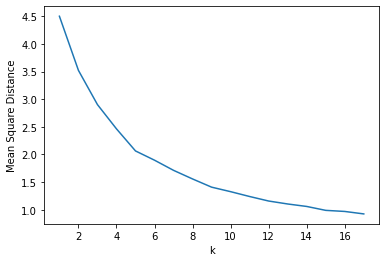

In [34]:
# get counts, convert to data vectors to use for clustering
game_counts, champ_counts, champ_pair_counts = get_counts(data_less, all_regions, s, 'presence')
vecs, champ_list, regions = get_vecs(champ_counts, game_counts)
print(vecs.shape)

k_vals = list(range(1, 18))
errs = [] # mean squared distance from centroid for each k (not technically an "error" but these are my variables and I name these what I want)
n = 100 # number of times to run for each value of k

for k in k_vals:
    err = []
    for j in range(n):
        centroids, clusters = None, None
        iters = 0
        while clusters is None:
            iters += 1
            centroids, clusters = k_means(vecs, k)
            if iters >= 10: # skip if cannot quickly find initial conditions that result in an empty cluster, bc I would like this to complete before I am dead
                print('Skipping during ' + str(k) + '-' + str(j)) # note that this happens a lot for higher k, but we don't really care, only cluster at that high of k for plotting purposes
                continue
        for i in range(len(clusters)): # add square distance from corresponding centroid for each data point
            err.append(np.linalg.norm(vecs[i, :] - centroids[clusters[i]])**2)
    errs.append(np.mean(err))
    
plt.plot(k_vals, errs)
plt.xlabel('k')
plt.ylabel('Mean Square Distance')

(63, 80)
Skipping during 12-2
Skipping during 12-2
Skipping during 12-2
Skipping during 12-2
Skipping during 12-2
Skipping during 12-2
Skipping during 12-2
Skipping during 12-18
Skipping during 12-18
Skipping during 12-18
Skipping during 12-18
Skipping during 12-18
Skipping during 12-18
Skipping during 12-18
Skipping during 12-18
Skipping during 12-18
Skipping during 12-18
Skipping during 12-22
Skipping during 12-22
Skipping during 12-22
Skipping during 12-22
Skipping during 12-33
Skipping during 12-33
Skipping during 12-33
Skipping during 12-55
Skipping during 12-70
Skipping during 12-70
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 12-98
Skipping during 13-11
Skipping during 13-42
Skipping during 13-42
Skipping during 13-47
Skipping during 13-47
Skipping during 13-47
Skipping

Skipping during 16-30
Skipping during 16-30
Skipping during 16-34
Skipping during 16-34
Skipping during 16-34
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-37
Skipping during 16-42
Skipping during 16-42
Skipping during 16-42
Skipping during 16-42
Skipping during 16-42
Skipping during 16-44
Skipping during 16-44
Skipping during 16-44
Skipping during 16-44
Skipping during 16-44
Skipping during 16-44
Skipping during 16-44
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping during 16-59
Skipping d

Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-45
Skipping during 17-54
Skipping during 17-58
Skipping during 17-58
Skipping during 17-58
Skipping during 17-58
Skipping during 17-58
Skipping during 17-58
Skipping during 17-58
Skipping during 17-58
Skipping during 17-58
Skipping during 17-58
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-59
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping d

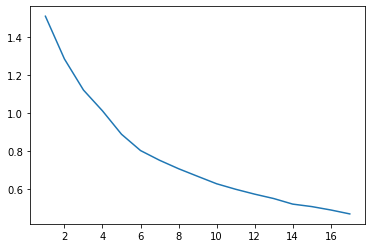

In [21]:
# pretend this cell has the same comments as previous one

game_counts, champ_counts, champ_pair_counts = get_counts(data_less, all_regions, 0.25, 'picks')
vecs, champ_list, regions = get_vecs(champ_counts, game_counts)
print(vecs.shape)

k_vals = list(range(1, 18))
errs = []
n = 100

for k in k_vals:
    err = []
    for j in range(n):
        centroids, clusters = None, None
        iters = 0
        while clusters is None:
            iters += 1
            centroids, clusters = k_means(vecs, k)
            if iters >= 10:
                print('Skipping during ' + str(k) + '-' + str(j))
                continue
        for i in range(len(clusters)):
            err.append(np.linalg.norm(vecs[i, :] - centroids[clusters[i]])**2)
    errs.append(np.mean(err))
    
plt.plot(k_vals, errs)
plt.xtitle('k')
plt.ytitle('Mean Square Distance')

(63, 211)
Skipping during 12-23
Skipping during 12-23
Skipping during 12-23
Skipping during 12-23
Skipping during 12-23
Skipping during 12-23
Skipping during 12-23
Skipping during 12-44
Skipping during 13-14
Skipping during 13-14
Skipping during 13-14
Skipping during 13-14
Skipping during 13-14
Skipping during 13-14
Skipping during 13-14
Skipping during 13-14
Skipping during 13-15
Skipping during 13-24
Skipping during 13-24
Skipping during 13-24
Skipping during 13-24
Skipping during 13-24
Skipping during 13-59
Skipping during 13-65
Skipping during 13-65
Skipping during 13-65
Skipping during 13-70
Skipping during 13-92
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 14-0
Skipping during 1

Skipping during 16-49
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-50
Skipping during 16-53
Skipping during 16-53
Skipping during 16-53
Skipping during 16-53
Skipping during 16-53
Skipping during 16-53
Skipping during 16-53
Skipping during 16-53
Skipping during 16-53
Skipping during 16-55
Skipping during 16-55
Skipping during 16-55
Skipping during 16-57
Skipping during 16-57
Skipping during 16-57
Skipping during 16-58
Skipping during 16-58
Skipping during 16-58
Skipping during 16-60
Skipping during 16-60
Skipping during 16-60
Skipping during 16-60
Skipping during 16-60
Skipping during 16-63
Skipping during 16-63
Skipping during 16-63
Skipping during 16-67
Skipping during 16-76
Skipping during 16-76
Skipping during 16-78
Skipping d

Skipping during 17-53
Skipping during 17-57
Skipping during 17-57
Skipping during 17-57
Skipping during 17-59
Skipping during 17-59
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-60
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-61
Skipping during 17-64
Skipping during 17-64
Skipping during 17-64
Skipping during 17-64
Skipping during 17-64
Skipping during 17-65
Skipping during 17-65
Skipping during 17-65
Skipping during 17-65
Skipping during 17-65
Skipping during 17-65
Skipping during 17-67
Skipping during 17-67
Skipping during 17-67
Skipping during 17-67
Skipping d

Text(0, 0.5, 'Mean Square Distance')

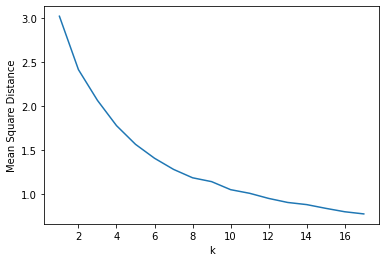

In [24]:
# see comment at top of previous cell

game_counts, champ_counts, champ_pair_counts = get_counts(data_less, all_regions, s)
vecs, champ_list, regions = get_vecs(champ_counts, game_counts)
print(vecs.shape)

k_vals = list(range(1, 18))
errs = []
n = 100

for k in k_vals:
    err = []
    for j in range(n):
        centroids, clusters = None, None
        iters = 0
        while clusters is None:
            iters += 1
            centroids, clusters = k_means(vecs, k)
            if iters >= 10:
                print('Skipping during ' + str(k) + '-' + str(j))
                continue
        for i in range(len(clusters)):
            err.append(np.linalg.norm(vecs[i, :] - centroids[clusters[i]])**2)
    errs.append(np.mean(err))
    
plt.plot(k_vals, errs)
plt.xlabel('k')
plt.ylabel('Mean Square Distance')

In the following cells, we take k=8, since the rate at which the mean square distance decreased seemed to slow somewhere around this point.

Cluster 0:
('CBLoL', 2016, 'Summer')
('EULCS', 2016, 'Summer')
('LCK', 2016, 'Summer')
('LCL', 2016, 'Summer')
('LJL', 2016, 'Summer')
('LMS', 2016, 'Summer')
('NALCS', 2016, 'Summer')
('OPL', 2016, 'Summer')
('TCL', 2016, 'Summer')
-------------
Cluster 1:
('EULCS', 2015, 'Summer')
('LCK', 2015, 'Summer')
('LMS', 2015, 'Summer')
('MSI', 2015, 'Spring')
('NALCS', 2015, 'Summer')
('TCL', 2015, 'Summer')
-------------
Cluster 2:
('EULCS', 2015, 'Spring')
('IEM', 2015, 'Spring')
('LCK', 2015, 'Spring')
('LMS', 2015, 'Spring')
('NALCS', 2015, 'Spring')
('TCL', 2015, 'Spring')
('WC', 2014, 'Summer')
-------------
Cluster 3:
('CBLoL', 2016, 'Spring')
('EULCS', 2016, 'Spring')
('IEM', 2015, 'Summer')
('IEM', 2016, 'Spring')
('LCK', 2016, 'Spring')
('LCL', 2016, 'Spring')
('LJL', 2016, 'Spring')
('LMS', 2016, 'Spring')
('MSI', 2016, 'Spring')
('NALCS', 2016, 'Spring')
('OPL', 2016, 'Spring')
('TCL', 2016, 'Spring')
('WC', 2015, 'Summer')
-------------
Cluster 4:
('CBLoL', 2017, 'Summer')
('CLS

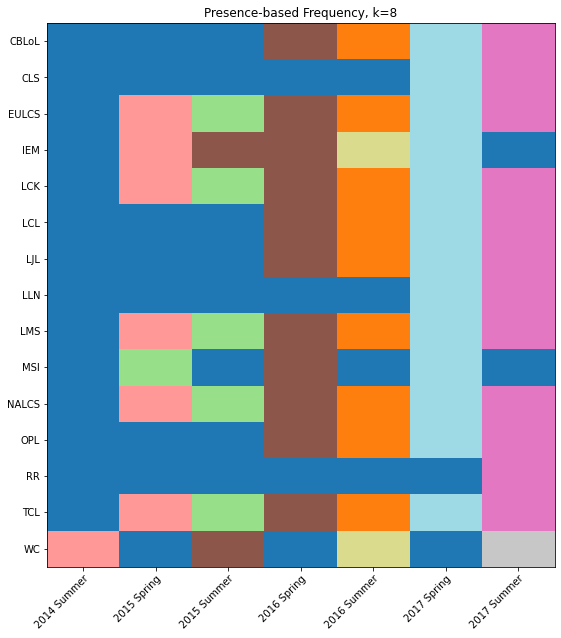

In [32]:
# get counts, convert to data vectors to use for clustering
game_counts, champ_counts, champ_pair_counts = get_counts(data_less, all_regions, s, 'presence')
vecs, champ_list, regions = get_vecs(champ_counts, game_counts)

n = 20 # number of candidate clusters to have
cluster_candidates = [] 
errs = [] # "error," as defined in previous cells
for j in range(n):
    err = []
    centroids, clusters = None, None
    iters = 0
    while clusters is None: # keep trying until some initialization doesn't cause a cluster to become empty
        centroids, clusters = k_means(vecs, 8)
    cluster_candidates.append(clusters)
    # calculate "errors" (distances) squared for each point to their corresponding centroid
    for i in range(len(clusters)): 
        err.append(np.linalg.norm(vecs[i, :] - centroids[clusters[i]])**2)
    errs.append(np.mean(err))

# pick clustering that minimizes the mean squared distance
idx = np.argmin(errs)
clusters = cluster_candidates[idx]

for i in range(8):
    print('Cluster {}:'.format(i))
    for j in range(len(clusters)):
        if clusters[j] == i:
            print(regions[j])
    print('-------------')
    
grid_plot_clusters(regions, clusters, 'Presence-based Frequency, k=8')

Cluster 0:
('CBLoL', 2016, 'Spring')
('EULCS', 2016, 'Spring')
('IEM', 2015, 'Summer')
('IEM', 2016, 'Spring')
('LCK', 2016, 'Spring')
('LCL', 2016, 'Spring')
('LJL', 2016, 'Spring')
('LMS', 2016, 'Spring')
('NALCS', 2016, 'Spring')
('OPL', 2016, 'Spring')
('TCL', 2016, 'Spring')
('WC', 2015, 'Summer')
-------------
Cluster 1:
('CBLoL', 2017, 'Spring')
('CLS', 2017, 'Spring')
('EULCS', 2017, 'Spring')
('IEM', 2017, 'Spring')
('LCK', 2017, 'Spring')
('LCL', 2017, 'Spring')
('LJL', 2017, 'Spring')
('LLN', 2017, 'Spring')
('LMS', 2017, 'Spring')
('MSI', 2017, 'Spring')
('NALCS', 2017, 'Spring')
('OPL', 2017, 'Spring')
('TCL', 2017, 'Spring')
-------------
Cluster 2:
('EULCS', 2016, 'Summer')
('LCK', 2016, 'Summer')
('LCL', 2016, 'Summer')
('LMS', 2016, 'Summer')
('NALCS', 2016, 'Summer')
('OPL', 2016, 'Summer')
('TCL', 2016, 'Summer')
-------------
Cluster 3:
('EULCS', 2015, 'Spring')
('IEM', 2015, 'Spring')
('LCK', 2015, 'Spring')
('LMS', 2015, 'Spring')
('NALCS', 2015, 'Spring')
('TCL',

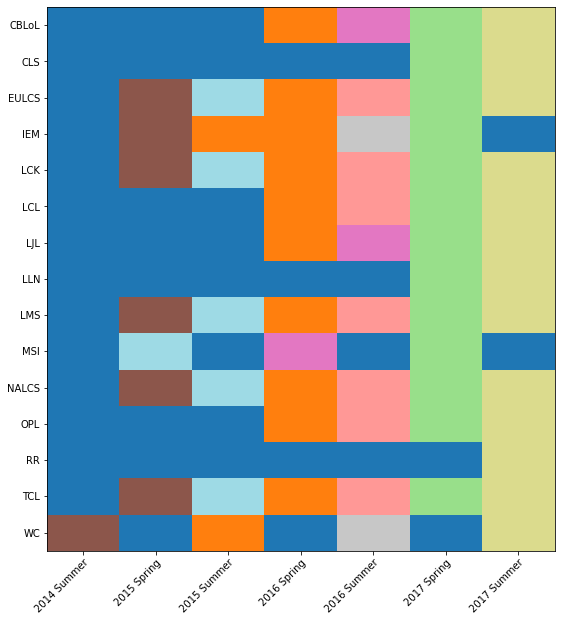

In [26]:
# see top of three cells ago

game_counts, champ_counts, champ_pair_counts = get_counts(data_less, all_regions, s, 'picks')
vecs, champ_list, regions = get_vecs(champ_counts, game_counts)

n = 20 
cluster_candidates = []
errs = []
for j in range(n):
    err = []
    centroids, clusters = None, None
    iters = 0
    while clusters is None:
        centroids, clusters = k_means(vecs, 8)
    cluster_candidates.append(clusters)
    for i in range(len(clusters)):
        err.append(np.linalg.norm(vecs[i, :] - centroids[clusters[i]])**2)
    errs.append(np.mean(err))
idx = np.argmin(errs)
clusters = cluster_candidates[idx]

for i in range(8):
    print('Cluster {}:'.format(i))
    for j in range(len(clusters)):
        if clusters[j] == i:
            print(regions[j])
    print('-------------')
    
grid_plot_clusters(regions, clusters, '')

Cluster 0:
('IEM', 2017, 'Spring')
-------------
Cluster 1:
('CBLoL', 2017, 'Spring')
('CLS', 2017, 'Spring')
('EULCS', 2017, 'Spring')
('IEM', 2016, 'Summer')
('LCK', 2017, 'Spring')
('LCL', 2017, 'Spring')
('LJL', 2017, 'Spring')
('LLN', 2017, 'Spring')
('LMS', 2017, 'Spring')
('MSI', 2017, 'Spring')
('NALCS', 2017, 'Spring')
('OPL', 2017, 'Spring')
('TCL', 2017, 'Spring')
-------------
Cluster 2:
('CBLoL', 2016, 'Spring')
('EULCS', 2016, 'Spring')
('IEM', 2016, 'Spring')
('LCK', 2016, 'Spring')
('LCL', 2016, 'Spring')
('LJL', 2016, 'Spring')
('LMS', 2016, 'Spring')
('MSI', 2016, 'Spring')
('NALCS', 2016, 'Spring')
('OPL', 2016, 'Spring')
('TCL', 2016, 'Spring')
-------------
Cluster 3:
('CBLoL', 2017, 'Summer')
('CLS', 2017, 'Summer')
('EULCS', 2017, 'Summer')
('LCK', 2017, 'Summer')
('LCL', 2017, 'Summer')
('LJL', 2017, 'Summer')
('LLN', 2017, 'Summer')
('LMS', 2017, 'Summer')
('NALCS', 2017, 'Summer')
('OPL', 2017, 'Summer')
('RR', 2017, 'Summer')
('TCL', 2017, 'Summer')
('WC', 20

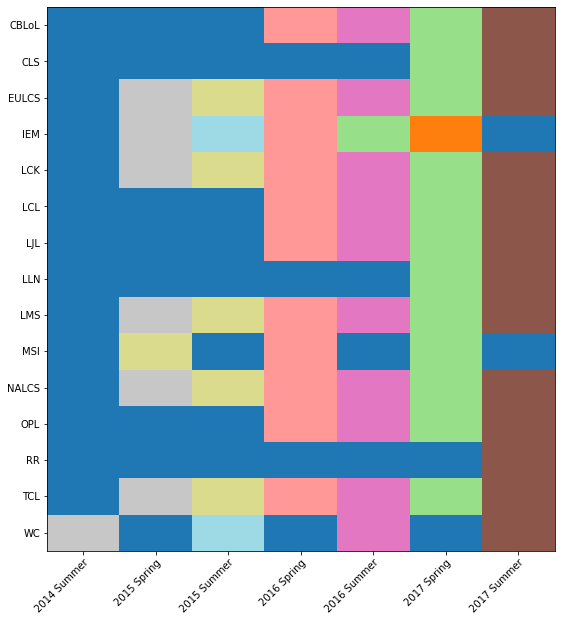

In [27]:
# same comments as previous cells

game_counts, champ_counts, champ_pair_counts = get_counts(data_less, all_regions, s)
vecs, champ_list, regions = get_vecs(champ_counts, game_counts)

n = 20
cluster_candidates = []
errs = []
for j in range(n):
    err = []
    centroids, clusters = None, None
    iters = 0
    while clusters is None:
        centroids, clusters = k_means(vecs, 8)
    cluster_candidates.append(clusters)
    for i in range(len(clusters)):
        err.append(np.linalg.norm(vecs[i, :] - centroids[clusters[i]])**2)
    errs.append(np.mean(err))
idx = np.argmin(errs)
clusters = cluster_candidates[idx]

for i in range(8):
    print('Cluster {}:'.format(i))
    for j in range(len(clusters)):
        if clusters[j] == i:
            print(regions[j])
    print('-------------')
    
grid_plot_clusters(regions, clusters, '')